In [1]:
#知识点
#1.逻辑方程预测
#2.SIR方程预测


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.optimize import curve_fit
import seaborn as sns

In [ ]:
#方法1  逻辑方程预测

In [10]:
#step1.构建函数
#P(t)=  (N*P0*e^rt)/(N+P0 (e^rt-1) )
def LogisticEquation(t,N,P0,r):
    '''
    t:时间
    t0:初始时间
    P0:初始人数
    N:物种极限数量
    r:增长速率    
    '''   
    t0=0
    exp_index=np.exp(r*(t-t0))
    return (N*exp_index*P0)/(N+(exp_index-1)*P0)

In [11]:
#step2.模型建模、进行参数求解
#选择数据集进行拟合

In [12]:
df=pd.read_excel('D:/2022_py_code/03代码 (2)/03代码/data/01感染人数分布数据.xlsx',sheet_name='全国走势')

In [13]:
#这里选择从1月20日至2月25日的数据作为训练数据
df['序号'] = df.index #设置序号列，方便后续作图
df1 = df[0:37]#选取第0行至36行的数据(即2020年1月20日至2月25日的数据)

In [14]:
print(df1)

           日期   累计确诊     新增确诊  新增确诊（官网）       疑似     现有确诊    现有重症      死亡  \
0   2020-1-20    291      NaN      77.0     54.0      NaN     NaN     NaN   
1   2020-1-21    440    149.0     149.0      NaN      NaN   102.0     9.0   
2   2020-1-22    571    131.0     131.0    393.0      NaN    95.0    17.0   
3   2020-1-23    830    259.0     259.0   1072.0      NaN   177.0    25.0   
4   2020-1-24   1287    457.0     444.0   1965.0      NaN   237.0    41.0   
5   2020-1-25   1975    688.0     688.0   2684.0      NaN   324.0    56.0   
6   2020-1-26   2744    769.0     769.0   5794.0      NaN   461.0    80.0   
7   2020-1-27   4515   1771.0    1771.0   6973.0      NaN   976.0   106.0   
8   2020-1-28   5974   1459.0    1459.0   9239.0      NaN  1239.0   132.0   
9   2020-1-29   7711   1737.0    1737.0  12167.0      NaN  1370.0   170.0   
10  2020-1-30   9692   1981.0    1982.0  15238.0      NaN  1527.0   213.0   
11  2020-1-31  11791   2099.0    2102.0  17988.0      NaN  1795.0   259.0   

In [15]:
t = np.array(df1['序号'])#生成训练数据的X轴数据
P = np.array(df1['累计确诊'])#生成训练数据的Y值数据

In [16]:
#用最小二乘法估计拟合

In [17]:
popt, pcov = curve_fit(LogisticEquation, t, P)#调用curve_fit()函数

关于curve_fit
f: 模型函数f（x，…）。它必须将自变量作为第一个参数，其余你需要求的参数都放后面
xdata: 数组对象，测量数据的自变量。对于具有k个预测变量的函数，通常应为M长度序列或（k，M）形数组。
ydata: 数组对象，相关数据，长度M array-标称。f(xdata, ...)


popt: 数组，参数的最佳值，以使的平方残差之和最小。f(xdata, *popt) - ydata
pcov: 二维阵列，popt的估计协方差。对角线提供参数估计的方差。


In [21]:
print(popt)#打印出拟合的最佳参数：“最大人数，初始人数，增长率”。

[8.13457295e+04 1.06801856e+03 2.23107521e-01]


In [24]:
#step3.进行模型预测

In [25]:
#将上面的结果拿到这里
N=81346
P0=1068
r=0.2231

In [26]:
t = np.linspace(0, 70, 71)#产生0-70之间，产生均匀间隔的数字，生成X轴数据
P_predict = LogisticEquation(t,N,P0,r)#逻辑方程的预测值
print(P_predict)#打印出逻辑方程预测的累计确诊人数

[ 1068.          1330.57549562  1656.37508403  2059.8950235
  2558.56278238  3173.11872865  3927.9291628   4851.14889506
  5974.61590139  7333.32142182  8964.26500069 10904.49206593
 13188.14744966 15842.49367041 18883.06473765 22308.45455614
 26095.6175855  30196.85740295 34539.710968   39030.54440643
 43561.85131372 48022.2114524  52307.03134199 56327.92980952
 60019.07594888 63339.72133404 66273.17952276 68823.22346962
 71009.13708085 72860.53268266 74412.70884038 75702.94842404
 76767.85511288 77641.63559031 78355.14441202 78935.48891582
 79406.01168554 79786.50469523 80093.54807164 80340.90033505
 80539.89356817 80699.80628702 80828.20000181 80931.21399641
 81013.81804285 81080.02567343 81133.07205528 81175.56101416
 81209.58571889 81236.82721281 81258.63452027 81276.08955812
 81290.0595971  81301.23957347 81310.18615864 81317.34515638
 81323.07351179 81327.65697685 81331.32428064 81334.2584896
 81336.60611144 81338.4843883  81339.9871377  81341.18942956
 81342.15133052 81342.9209

In [27]:
#step4 可视化


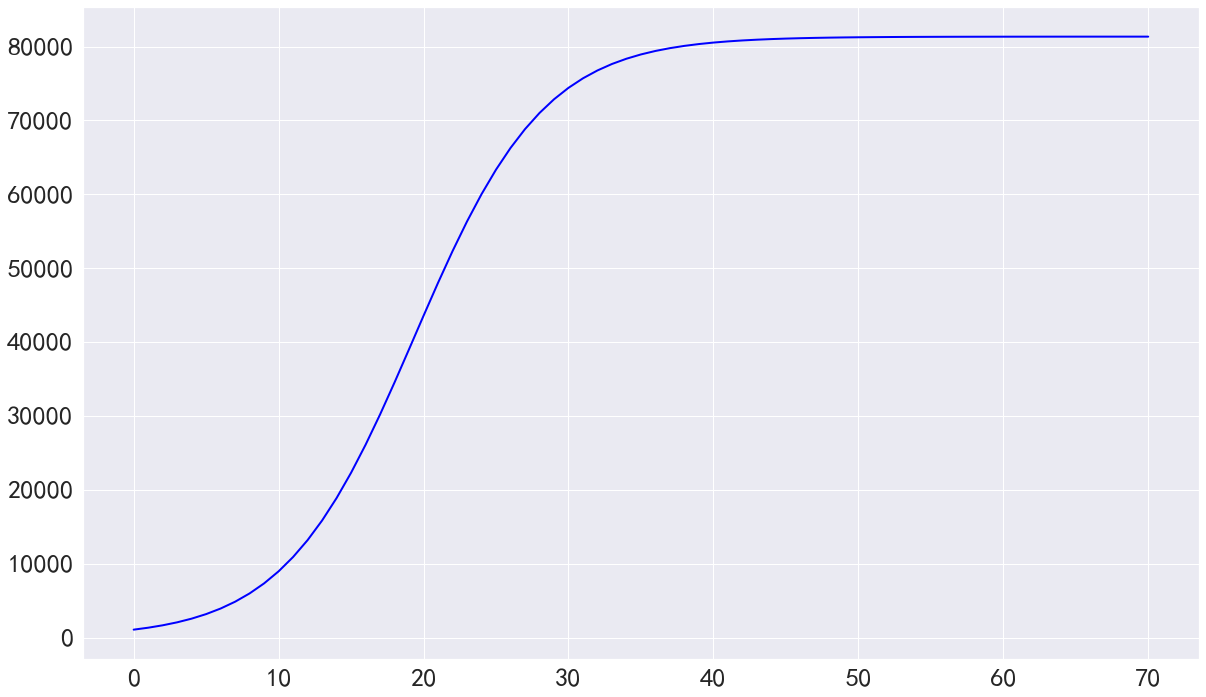

In [28]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.4,font='SimHei') 
#设置字体大小、字体（这里是黑体）,预防汉字不显示
plt.plot(t, P_predict, 'blue',lw=2,label='Logistic拟合函数(预测曲线)')

In [29]:
#作出逻辑方程拟合函数（预测曲线）

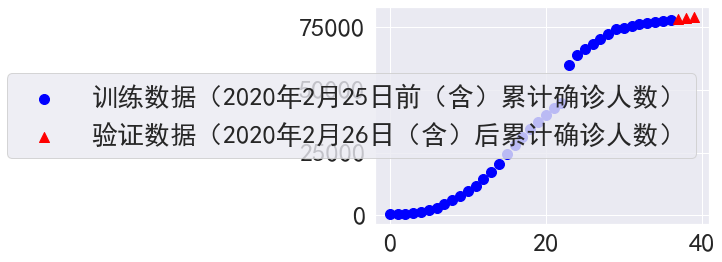

In [30]:
plt.scatter(df[:37].序号,df[:37].累计确诊,s=100,marker='o',c='blue',label='训练数据（2020年2月25日前（含）累计确诊人数）') #对照的训练数据
plt.scatter(df[37:].序号,df[37:].累计确诊,c='red',s=100,marker='^',label='验证数据（2020年2月26日（含）后累计确诊人数）') #对照的验证数据
plt.legend()
plt.show()

In [56]:
#方法2 SIR预测
from scipy.integrate import odeint 
from scipy import integrate, optimize

In [32]:
#step1、 定义微分方程

In [33]:
def SIR(y,x,alpha,beta):#定义微分方程   
    "SIR模型的微分方程"
    S, I, R = y  
    dS_dt = -alpha * I * S
    dI_dt = alpha * I * S - beta * I
    dR_dt = beta * I
    return [dS_dt, dI_dt, dR_dt]

In [35]:
s0, i0, r0 = 1000, 10, 0 # 定义初始情况，易感染人数1000人，感染人1，恢复人0 
alpha,beta = 0.002, 0.2 #感染比例与恢复比例的值
x = np.linspace(0, 30, 5000) #定义时间x

In [38]:
result = odeint(SIR, [s0, i0, r0], x, args=(alpha,beta)) #求解微分方程
St, It, Rt = result[:, 0], result[:, 1], result[:, 2] 

In [39]:
print(Rt)

[0.00000000e+00 1.20674730e-02 2.42659512e-02 ... 1.00566520e+03
 1.00567035e+03 1.00567549e+03]


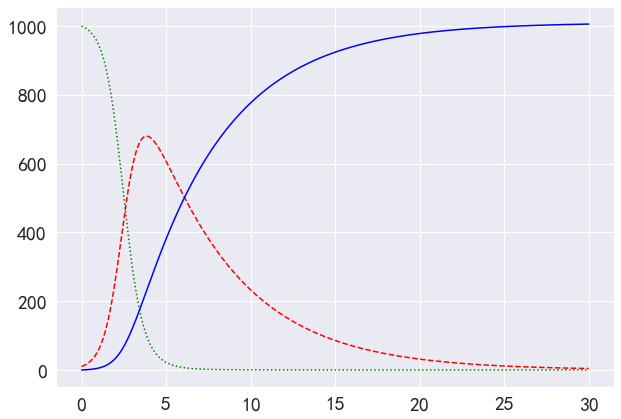

In [41]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.8,font='SimHei') #设置字体大小、字体（这里是黑体）,预防汉字不显示
plt.plot(x, St, c="green", linestyle=':',label="易感染人数") 
plt.plot(x, It, c="red",linestyle='--', label="感染人数") 
plt.plot(x, Rt, c="blue", label="移出人数") 

In [42]:
#step2、参数求解

In [43]:
ydata = np.array(df1['累计确诊'])#生成训练数据的Y值数据 
xdata = np.array(df1['序号'])#生成训练数据的X轴数据

In [44]:
#定义均方误差函数
def error(res):
    errsum = np.mean((ydata - res)**2)   #errsum = sum(err)
    return errsum

In [45]:
def SIR(y,x,alpha,beta):#定义微分方程   
    "SIR模型的微分方程"
    S, I, R = y  
    dS_dt = -alpha * I * S
    dI_dt = alpha * I * S - beta * I
    dR_dt = beta * I
    return [dS_dt, dI_dt, dR_dt]

In [46]:
i0 = 149 #设置初始感染者，这里根据1月21日的数据带入
r0 = 440 #初始隔离者（累计确诊人数）
S0 = [i for i in range(20000, 1000100, 100)]
#生成预估S0的所有值，这里估算的范围为20000到1000000之间，每隔100的数作为实验数据。

In [47]:
print(S0)

[20000, 20100, 20200, 20300, 20400, 20500, 20600, 20700, 20800, 20900, 21000, 21100, 21200, 21300, 21400, 21500, 21600, 21700, 21800, 21900, 22000, 22100, 22200, 22300, 22400, 22500, 22600, 22700, 22800, 22900, 23000, 23100, 23200, 23300, 23400, 23500, 23600, 23700, 23800, 23900, 24000, 24100, 24200, 24300, 24400, 24500, 24600, 24700, 24800, 24900, 25000, 25100, 25200, 25300, 25400, 25500, 25600, 25700, 25800, 25900, 26000, 26100, 26200, 26300, 26400, 26500, 26600, 26700, 26800, 26900, 27000, 27100, 27200, 27300, 27400, 27500, 27600, 27700, 27800, 27900, 28000, 28100, 28200, 28300, 28400, 28500, 28600, 28700, 28800, 28900, 29000, 29100, 29200, 29300, 29400, 29500, 29600, 29700, 29800, 29900, 30000, 30100, 30200, 30300, 30400, 30500, 30600, 30700, 30800, 30900, 31000, 31100, 31200, 31300, 31400, 31500, 31600, 31700, 31800, 31900, 32000, 32100, 32200, 32300, 32400, 32500, 32600, 32700, 32800, 32900, 33000, 33100, 33200, 33300, 33400, 33500, 33600, 33700, 33800, 33900, 34000, 34100, 34200

In [48]:
minSum = 1e20 #选取一个较大的误差，作为初始误差
mins0 = 0.0 #定义一个初始的s0
best_alpha = 0.0 #定义一个初始的alpha值
best_beta = 0.0 #定义一个初始的beta值

In [50]:
best_beta
for s0 in S0:
    # print(s0)    
    def fit_odeint(x, alpha,beta):#定义求解微分方程函数
        beta = 1
        result = integrate.odeint(SIR, (s0, i0, r0), x,args=(alpha,beta))
        St, It, Rt = result[:, 0], result[:, 1],result[:, 2]
        return Rt

In [51]:
#这里假设beta为1，即所有的新增病例均被有效隔离，也可以不假设，由数据进行拟合，但可能对新增确诊病例数据拟合不是很符合

In [57]:
popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)#由前文生成的训练数据，进行模型拟合。求解相应参数：alpha=popt[0], beta=popt[1])
fitted = fit_odeint(xdata, *popt)#将拟合参数代入fit_odeint函数，求解该微分方程下Rt的值

D:\anaconda\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [58]:
errsum = error(fitted)#代入error函数，求解预测值和真实值之间的误差

In [59]:
if errsum < minSum:#对每个模型循环计算，最终选取误差最小的参数
        minSum = errsum
        mins0 = s0
        best_alpha = popt[0]
        best_beta = popt[1]

In [60]:
print("最佳参数: alpha =", best_alpha, " and s0 = ", mins0)

最佳参数: alpha = -99.00002619116832  and s0 =  1000000
